Loading Dataset
400
1: avg loss = 0.0012458807229995727
400
2: avg loss = 0.0007735355943441391
400
3: avg loss = 0.0017819853127002715
400
4: avg loss = 0.0020619040727615358
400
5: avg loss = 0.0013660697638988495
400
6: avg loss = 0.0014906421303749085
400
7: avg loss = 0.0012533733248710633
400
8: avg loss = 0.0009951284527778626
400
9: avg loss = 0.0008629979938268662
400
10: avg loss = 0.0014579521119594573
400
11: avg loss = 0.0013297024369239808
400
12: avg loss = 0.0008967743068933487
400
13: avg loss = 0.0009712277352809906
400
14: avg loss = 0.0007655119895935059
400
15: avg loss = 0.0009286376088857651
400
16: avg loss = 0.0010646051168441773
400
17: avg loss = 0.0013446702063083648
400
18: avg loss = 0.001262309104204178
400
19: avg loss = 0.0011426053196191789
400
20: avg loss = 0.002017074227333069
400
21: avg loss = 0.0009618111699819565
400
22: avg loss = 0.0007229414582252502
400
23: avg loss = 0.0008044103533029557
400
24: avg loss = 0.0009076476842164994
400
25: avg

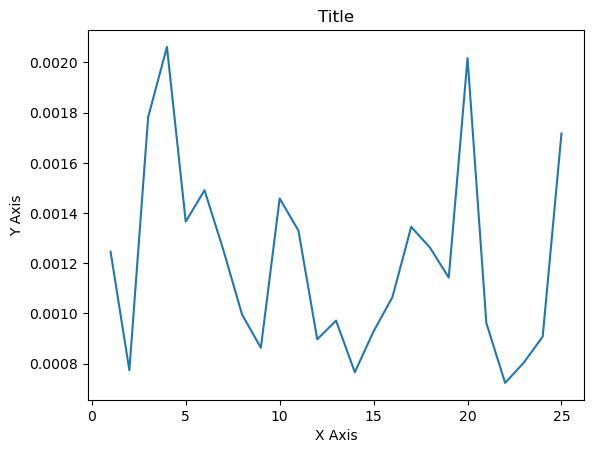

In [2]:
from importlib.resources import files

from qch2025.pkg.models.RNN import network as network
from qch2025.pkg.models.RNN import func as func

from qch2025.pkg.dataset import Dataset

import qch2025.pkg.plotting as plt

import numpy as np
import pandas as pd

n_epochs = 25
n_batches = 200

ds_path = files("qch2025.dataset")

train_path = ds_path.joinpath("train.csv")
train_dataset = Dataset(dataset_path=train_path)

rnn = network.RNN(14, 128, 2)
losses = func.train(rnn, dataset=train_dataset, epochs=n_epochs,
           batch_size=n_batches, learning_rate=0.01)


eval_path = ds_path.joinpath("test.csv")
eval_dataset = Dataset(dataset_path=eval_path)

preds, ids = func.eval(rnn, eval_dataset)

y1, y2 = zip(*preds)

df = pd.DataFrame({"Y1": y1, "Y2": y2})
df.index.name = "id"
df.index = df.index + 1
df.to_csv("/Users/apple/Documents/github/quantchallenge-2025/qch2025/outputs/predicted.csv")



plt.plot_line(np.arange(1, n_epochs+1), losses)






